In [ ]:
"""
EDA on NIR artificially generated data
Developed by Md Mahmudul Haque
"""

In [1]:
import os
import json
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict, train_test_split

Data directories

In [2]:
working_dir = os.getcwd()
parent_dir = "/".join(working_dir.split("/")[:-1])
data_dir = f"{parent_dir}/data"
data_list = os.listdir(data_dir)

print(f"[Info:] Parent Directory: {parent_dir}")
print(f"[Info:] Working Directory: {working_dir}")
print(f"[Info:] Data Directory: {data_list}")

[Info:] Parent Directory: /home/arfan/Documents/Others/Omegga/project
[Info:] Working Directory: /home/arfan/Documents/Others/Omegga/project/dev
[Info:] Data Directory: ['final_data.xlsx', 'raw_data.xlsx', 'test_data.csv']


In [3]:
df = pd.read_excel(f"{data_dir}/final_data.xlsx")

In [4]:
df.head()

,CA (HPLC),1350.16,1352.64,1355.14,1357.64,1360.16,1362.68,1365.21,1367.75,1370.3,...,2472.75,2481.1,2489.51,2497.97,2506.5,2515.08,2523.72,2532.42,2541.18,2550
0,3.10,0.531762,0.529936,0.527726,0.525141,0.522454,0.520010,0.518074,0.516669,0.515532,...,0.115713,0.114427,0.114028,0.113629,0.112668,0.111075,0.109287,0.108057,0.108154,0.110056
1,1.70,0.493385,0.491424,0.489255,0.486934,0.484654,0.482623,0.480971,0.479650,0.478430,...,0.121258,0.120041,0.119703,0.119343,0.118401,0.116816,0.115031,0.113799,0.113877,0.115740
2,4.85,0.580530,0.579073,0.577321,0.575254,0.573077,0.571064,0.569432,0.568201,0.567157,...,0.138851,0.137146,0.136401,0.135649,0.134322,0.132407,0.130416,0.129148,0.129357,0.131463
3,6.95,0.478529,0.476907,0.475031,0.472942,0.470859,0.469040,0.467646,0.466637,0.465746,...,0.102924,0.101630,0.101064,0.100501,0.099505,0.098055,0.096528,0.095528,0.095639,0.097198
4,1.75,0.622995,0.620892,0.618902,0.616937,0.614918,0.612843,0.610757,0.608700,0.606628,...,0.165434,0.163708,0.162174,0.160288,0.157992,0.155738,0.154272,0.154372,0.156098,0.158770


In [5]:
df.shape

(1000, 258)

In [6]:
df.head()

,CA (HPLC),1350.16,1352.64,1355.14,1357.64,1360.16,1362.68,1365.21,1367.75,1370.3,...,2472.75,2481.1,2489.51,2497.97,2506.5,2515.08,2523.72,2532.42,2541.18,2550
0,3.10,0.531762,0.529936,0.527726,0.525141,0.522454,0.520010,0.518074,0.516669,0.515532,...,0.115713,0.114427,0.114028,0.113629,0.112668,0.111075,0.109287,0.108057,0.108154,0.110056
1,1.70,0.493385,0.491424,0.489255,0.486934,0.484654,0.482623,0.480971,0.479650,0.478430,...,0.121258,0.120041,0.119703,0.119343,0.118401,0.116816,0.115031,0.113799,0.113877,0.115740
2,4.85,0.580530,0.579073,0.577321,0.575254,0.573077,0.571064,0.569432,0.568201,0.567157,...,0.138851,0.137146,0.136401,0.135649,0.134322,0.132407,0.130416,0.129148,0.129357,0.131463
3,6.95,0.478529,0.476907,0.475031,0.472942,0.470859,0.469040,0.467646,0.466637,0.465746,...,0.102924,0.101630,0.101064,0.100501,0.099505,0.098055,0.096528,0.095528,0.095639,0.097198
4,1.75,0.622995,0.620892,0.618902,0.616937,0.614918,0.612843,0.610757,0.608700,0.606628,...,0.165434,0.163708,0.162174,0.160288,0.157992,0.155738,0.154272,0.154372,0.156098,0.158770


EDA

In [7]:
print(df.columns)

Index(['CA (HPLC)',     1350.16,     1352.64,     1355.14,     1357.64,
           1360.16,     1362.68,     1365.21,     1367.75,      1370.3,
       ...
           2472.75,      2481.1,     2489.51,     2497.97,      2506.5,
           2515.08,     2523.72,     2532.42,     2541.18,        2550],
      dtype='object', length=258)


In [8]:
# taking just one row and all the spectral values for that row
X = -np.log(df.values[500, 1:].astype(np.float32))
absorbance = df.values[:, 0]
# labelling just for visualisation purpose will not be directly used
# in the training
y = LabelEncoder().fit_transform(absorbance)

In [9]:
y[:10]

array([60, 34, 74, 98, 35, 91, 90, 34, 58, 13])

In [10]:
len(set(y))

111

In [11]:
X.shape

(257,)

In [12]:
X.shape

(257,)

In [13]:
absorbance[:10]

array([3.1 , 1.7 , 4.85, 6.95, 1.75, 6.3 , 6.25, 1.7 , 3.  , 0.89])

In [14]:
df.columns[1:]

Index([1350.16, 1352.64, 1355.14, 1357.64, 1360.16, 1362.68, 1365.21, 1367.75,
        1370.3, 1372.87,
       ...
       2472.75,  2481.1, 2489.51, 2497.97,  2506.5, 2515.08, 2523.72, 2532.42,
       2541.18,    2550],
      dtype='object', length=257)

In [15]:
# smoothing the data
window = 21
X_smooth_1 = savgol_filter(X, window_length=window, polyorder=1, deriv=0)
X_smooth_2 = savgol_filter(X, window_length=window, polyorder=2, deriv=0)
X_smooth_3 = savgol_filter(X, window_length=window, polyorder=3, deriv=0)

wavelength = df.columns[1:]#np.linspace(df.columns[1], df.columns[-1], 1)

In [16]:
wavelength

Index([1350.16, 1352.64, 1355.14, 1357.64, 1360.16, 1362.68, 1365.21, 1367.75,
        1370.3, 1372.87,
       ...
       2472.75,  2481.1, 2489.51, 2497.97,  2506.5, 2515.08, 2523.72, 2532.42,
       2541.18,    2550],
      dtype='object', length=257)

In [17]:
wavelength.shape

(257,)

In [18]:
interval = np.arange(wavelength[0], wavelength[-1], 1)
interval

array([1350.16, 1351.16, 1352.16, ..., 2547.16, 2548.16, 2549.16])

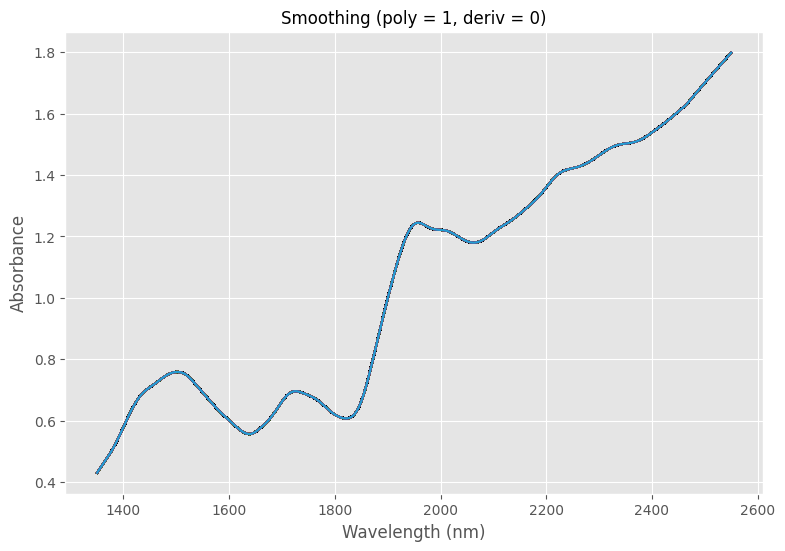

In [19]:
plt.figure(figsize=(9, 6))
colours = [plt.cm.jet(float(i)/max(y)) for i in y]
with plt.style.context("ggplot"):
    for i, c in enumerate(colours):
        plt.plot(wavelength, X_smooth_1, c=c, alpha=0.5)
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Absorbance")    
plt.title("Smoothing (poly = 1, deriv = 0)")
plt.show()

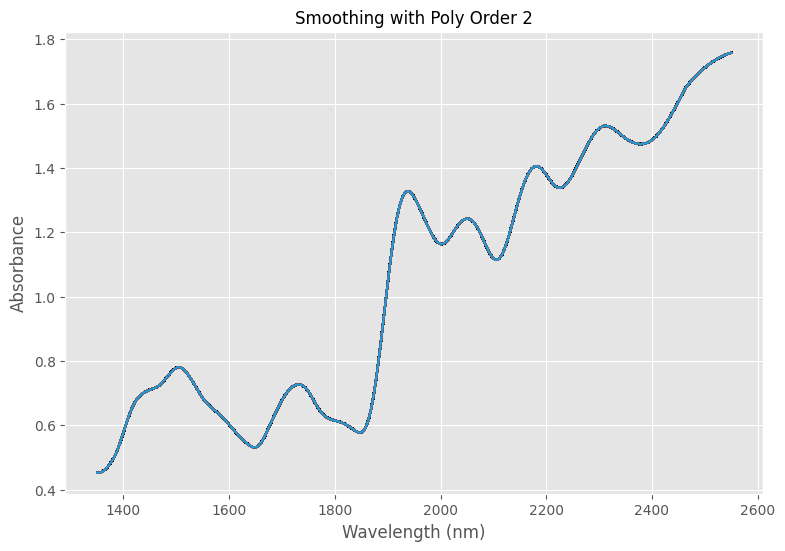

In [20]:
plt.figure(figsize=(9, 6))
colours = [plt.cm.jet(float(i)/max(y)) for i in y]
with plt.style.context("ggplot"):
    for i, c in enumerate(colours):
        plt.plot(wavelength, X_smooth_2, c=c, alpha=0.5)
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Absorbance")    
plt.title("Smoothing with Poly Order 2")
plt.show()

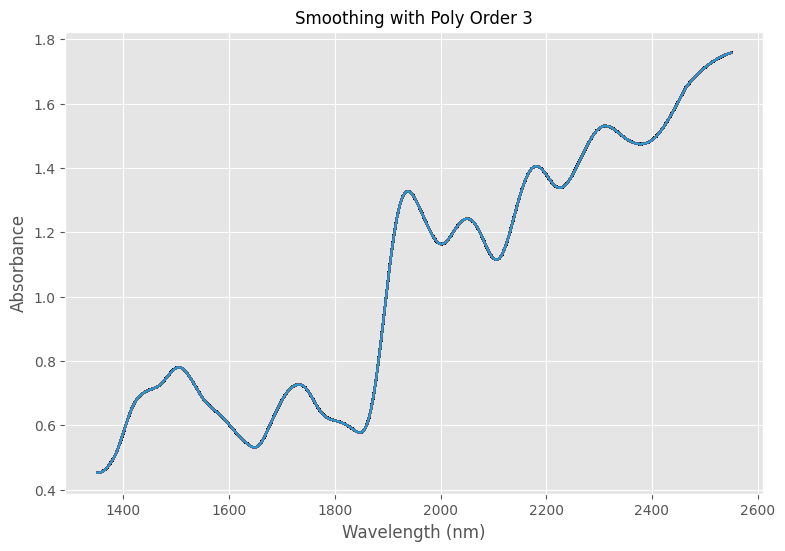

In [21]:
plt.figure(figsize=(9, 6))
colours = [plt.cm.jet(float(i)/max(y)) for i in y]
with plt.style.context("ggplot"):
    for i, c in enumerate(colours):
        plt.plot(wavelength, X_smooth_2, c=c, alpha=0.5)
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Absorbance")    
plt.title("Smoothing with Poly Order 3")
plt.show()

it looks like the curves of the wavelenghts are more separable when the polynomial order is 2 or more and the window is 21.

but still inconclusive. also, more than quadratic differentiation, the explainability might lose.

To select the optimal value, let's opt for power spectrum using Fast Fourier Transformation (FFT).

In [22]:
first_fft = np.fft.fft(X)
# shifting zero-freq component to the center of the spectrum
# the output will contain imeginary part because of first derivative
# of the fs
shifted_fft = np.fft.fftshift(first_fft)
# taking power spectrum
power_spectrum = np.abs(shifted_fft)**2

In [23]:
pixels = np.arange(X.shape[0])
fourier_pixels = np.arange(power_spectrum.shape[0]) - power_spectrum.shape[0]//2

In [24]:
print(X.shape)
print(pixels.shape)
print(fourier_pixels.shape)

(257,)
(257,)
(257,)


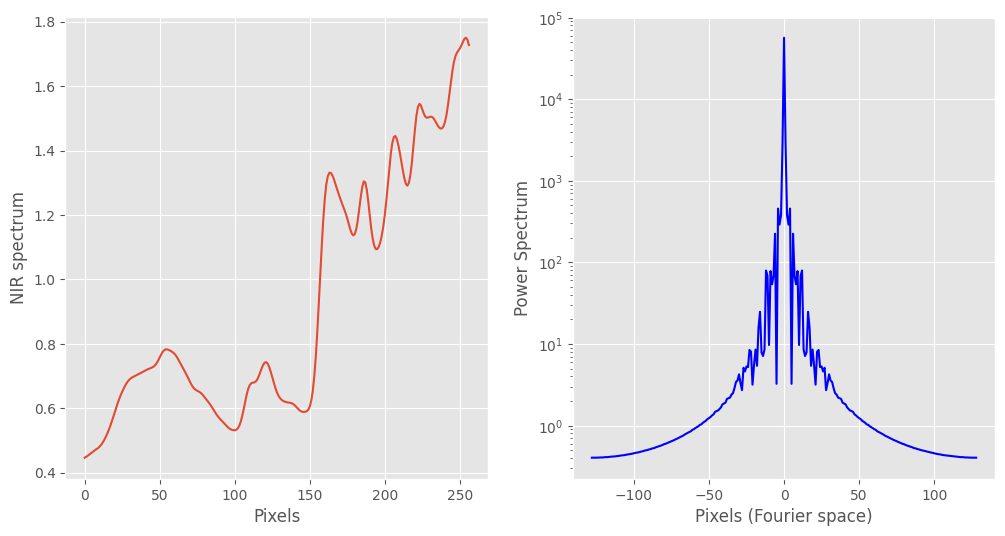

In [25]:
with plt.style.context(('ggplot')):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    axes[0].plot(pixels, X)
    axes[0].set_xlabel('Pixels')
    axes[0].set_ylabel('NIR spectrum')
    
    axes[1].semilogy(fourier_pixels, power_spectrum, 'b')
    axes[1].set_xlabel('Pixels (Fourier space)')
    axes[1].set_ylabel('Power Spectrum')

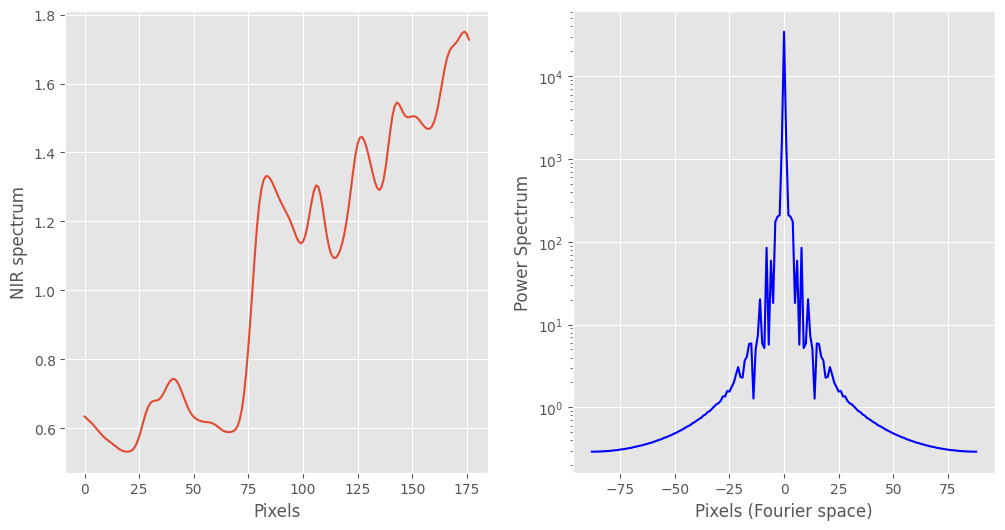

In [26]:
# approximately the featureless region is starting from around 80.
# as there are less sudden peaks, last range of the value is taken up to 257

first_fft_modified = np.fft.fft(X[80:257])
# shifting zero-freq component to the center of the spectrum
# the output will contain imeginary part because of first derivative
# of the fs
shifted_fft_modified = np.fft.fftshift(first_fft_modified)
# taking power spectrum
power_spectrum_modified = np.abs(shifted_fft_modified)**2

pixels_modified = np.arange(X[80:257].shape[0])
fourier_pixels_modified = np.arange(power_spectrum_modified.shape[0]) - power_spectrum_modified.shape[0]//2

with plt.style.context(('ggplot')):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    axes[0].plot(pixels_modified, X[80:257])
    axes[0].set_xlabel('Pixels')
    axes[0].set_ylabel('NIR spectrum')
    
    axes[1].semilogy(fourier_pixels_modified, power_spectrum_modified, 'b')
    axes[1].set_xlabel('Pixels (Fourier space)')
    axes[1].set_ylabel('Power Spectrum')

taking the values from 80 to 257 which is outside of the feature region for this data

In [27]:
# data smoothing check
window = 21
X_smooth_1 = savgol_filter(X, window_length=window, polyorder=1, deriv=0)
X_smooth_2 = savgol_filter(X, window_length=window, polyorder=2, deriv=0)
X_smooth_3 = savgol_filter(X, window_length=window, polyorder=3, deriv=0)

first_fft = np.fft.fft(X[80:257])
shifted_fft = np.fft.fftshift(first_fft)
power_spectrum = np.abs(shifted_fft)**2

first_fft_smooth_1 = np.fft.fft(X_smooth_1[80:257])
shifted_fft_smooth_1 = np.fft.fftshift(first_fft_smooth_1)
power_spectrum_smooth_1 = np.abs(shifted_fft_smooth_1)**2

first_fft_smooth_2 = np.fft.fft(X_smooth_2[80:257])
shifted_fft_smooth_2 = np.fft.fftshift(first_fft_smooth_2)
power_spectrum_smooth_2 = np.abs(shifted_fft_smooth_2)**2

first_fft_smooth_3 = np.fft.fft(X_smooth_3[80:257])
shifted_fft_smooth_3 = np.fft.fftshift(first_fft_smooth_3)
power_spectrum_smooth_3 = np.abs(shifted_fft_smooth_3)**2

fourier_pixels = np.arange(power_spectrum.shape[0]) - power_spectrum[0] // 2

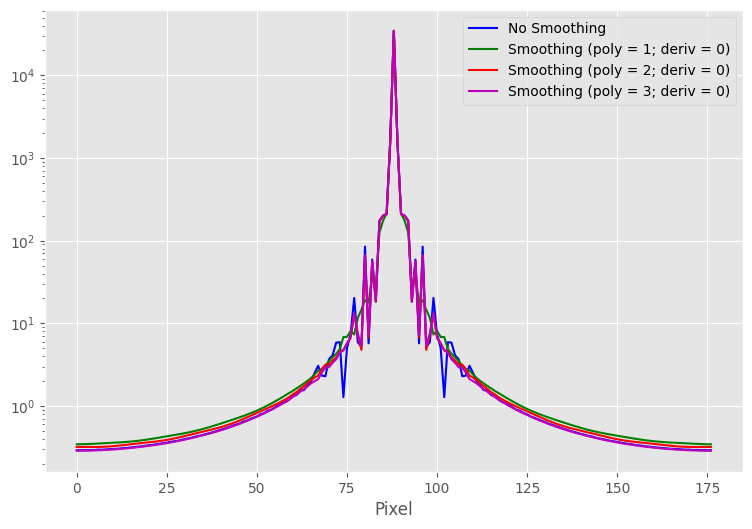

In [28]:
plt.figure(figsize=(9, 6))
colours = [plt.cm.jet(float(i)/max(y)) for i in y]
with plt.style.context("ggplot"):
    plt.semilogy(fourier_pixels, power_spectrum, c="b", label="No Smoothing")
    plt.semilogy(fourier_pixels, power_spectrum_smooth_1, c="g", label="Smoothing (poly = 1; deriv = 0)")
    plt.semilogy(fourier_pixels, power_spectrum_smooth_2, c="r", label="Smoothing (poly = 2; deriv = 0)")
    plt.semilogy(fourier_pixels, power_spectrum_smooth_3, c="m", label="Smoothing (poly = 3; deriv = 0)")
    plt.legend()
    plt.xlabel("Pixel")    
plt.show()

it looks like polynomial with 2 and 3 are nearly smoothing out but also no-smoothing is not quite different.

This might also mean that there are very few outliers in the data.

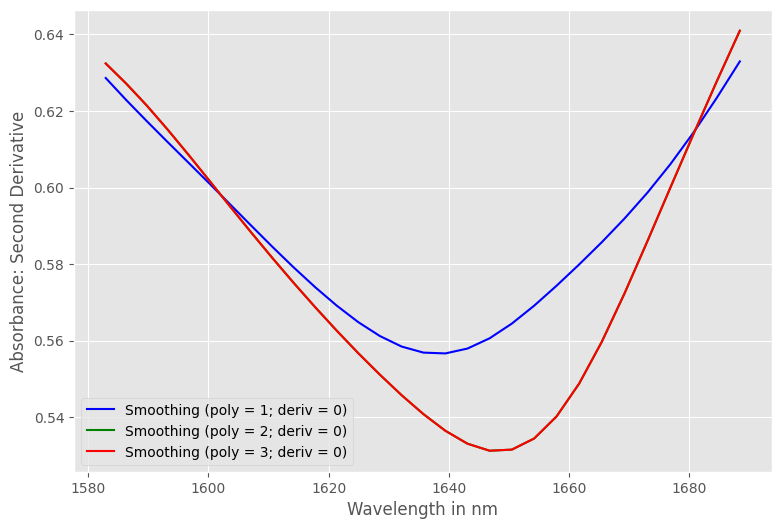

In [29]:
plt.figure(figsize=(9, 6))
interval = np.arange(80, 110)
with plt.style.context("ggplot"):
    plt.plot(wavelength[interval], X_smooth_1[interval], c="b", label="Smoothing (poly = 1; deriv = 0)")
    plt.plot(wavelength[interval], X_smooth_2[interval], c="g", label="Smoothing (poly = 2; deriv = 0)")
    plt.plot(wavelength[interval], X_smooth_3[interval], c="r", label="Smoothing (poly = 3; deriv = 0)")
    plt.xlabel("Wavelength in nm")
    plt.ylabel("Absorbance: Second Derivative")
    plt.legend()
    plt.show()

from this pov, it is evident that polyorder 2 and 3 are almost equally smoothing.

so, polyorder 2 can be chosen for well explainability. with window size = 21

Outlier Detection

In [30]:
# using pls with pre-defined components to finding out the
# useful feature that is going to be used and extracting out the
# outliers. as the data size is quite big, using pls components
# of 10 and onwards

X = df.values[:, 1:]
Y = df.values[:, 0]
n_components = 10

# smoothing
X_smoothed = savgol_filter(X[:, 80:257], window_length=21, polyorder=2, deriv=0)

pls = PLSRegression(n_components=n_components)
pls.fit(X_smoothed, Y)

PLSRegression(n_components=10)

In [31]:
# to find out score matrix T is being calculated
# then loading matrix from pls
# after that error matrix is being calculated
# two scatter technique is used so the equation
# is X = T (dot) P^T + E
T_matrix = pls.x_scores_
P_matrix = pls.x_loadings_
E_matrix = X_smoothed - np.dot(T_matrix, P_matrix.T)

# now to derive Q-residuals
Q_res = np.sum(E_matrix ** 2, axis=1)

# to calculate the useful data points T-squared needed
T_matrix_squared = np.sum((T_matrix / np.std(T_matrix, axis=0))**2, axis=1)

In [32]:
# calculating from T_matrix_squared to Hotelling's T-squared
# which is distributed according to F-distribution
# a library is getting used as mathematical explanation for me
# is kind of not cleared here 

conf_interval = 0.95

T_matrix_squared_conf =  f.ppf(
    q=conf_interval,
    dfn=n_components,
    dfd=(X_smoothed.shape[0]-n_components))*n_components*(X_smoothed.shape[0]-1)/(X_smoothed.shape[0]-n_components)

# estimation of the confidence level for the Q-res
i = np.max(Q_res)+1
while 1-np.sum(Q_res>i)/np.sum(Q_res>0)> conf_interval:
    i -= 1
Q_conf = i

In [33]:
Q_conf

np.float64(557.2336222889953)

In [34]:
T_matrix_squared_conf

np.float64(18.569795731817486)

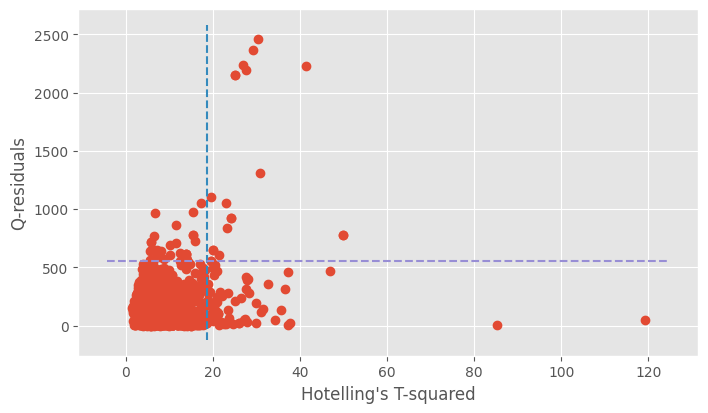

In [35]:
# plotting
ax = plt.figure(figsize=(8, 4.5))
with plt.style.context("ggplot"):
    plt.plot(T_matrix_squared, Q_res, "o")
    plt.plot([T_matrix_squared_conf, T_matrix_squared_conf], [plt.axis()[2], plt.axis()[3]], "--")
    plt.plot([plt.axis()[0], plt.axis()[1]], [Q_conf, Q_conf], "--")
    
    plt.xlabel("Hotelling's T-squared")
    plt.ylabel("Q-residuals")
plt.show()

it looks like some of the values are high in Q-residuals and
may not be well explained the Regressor that is used with fixed
component size. So, to make the model's coverage better, eliminating
those data points which are lying outside of the 95% confidence interval.

now, to estimate the predictive ability of the n_comp = 10 PLS Regressor,
removing outlier one by one up to a max value by keeping an eye on
the mean squared error (so that it does not increase drastically or overfits). later find the min of the mean_squared error.

In [36]:
print(Q_res.shape)
print(T_matrix_squared.shape)

(1000,)
(1000,)


In [37]:
outliers = ((Q_res > Q_conf) | (T_matrix_squared > T_matrix_squared_conf))
outliers.shape

(1000,)

In [38]:
X_no_outlier = X[~outliers]
y_no_outlier = Y[~outliers]

but not yet fully prepared (in my thinking). the thing is n_components are still not defined which are useful for which 
features are actually necessary to work with.

Feature Engineering

In [39]:
print(X_no_outlier.shape)
print(y_no_outlier.shape)

(886, 257)
(886,)


In [40]:
# from the previous steps the selected interval for smoothing will be 80 to 257
# with polynomial degree 2. also, from outlier detection using the T^2, T2 confidence
# interval and Q_residual with Q_residual confidence interval, outliers are eleminated
# matrices as they know the useful data points that can be. also cross validation
# will be used too.

# for variable selection, PLS is getting used as it is counting the Y value while
# performing the regression whereas PCA would only took into account for the features
# and would ignore the corresponding outcomes


# def select_feature_plsr(X: np.ndarray, Y: np.ndarray, max_components: int):
def select_feature_plsr_cv(X: np.ndarray, y: np.ndarray, n_components: int, cv: int=5):
    """selects feature that are minimum required for the PLSRegression
    to learn properly.
    
    selects 1 to n_components; creates PLSRegression model;
    then uses cross validation to train and predict. lastly,
    calculates mse, and with minimum mse; selects the minimum
    required components as features and trains the model to
    calculate further statistical result analysis (r^2 and mse)
    with cross validation and single calibration

    Args:
        X (np.ndarray): numpy array of input feature without outliers
        y (np.ndarray): numpy array of ground truth without outliers
        n_components (int): numper of maximum components
        cv (int, optional): integer cross validation. Defaults to 5.
    """    
    mse = []
    components = np.arange(1, n_components)
    
    for component in components:
        plsr = PLSRegression(n_components=component)
        y_cross_val = cross_val_predict(plsr, X, y, cv=cv)
        mse.append(mean_squared_error(y, y_cross_val))
    
    msemin = np.argmin(mse)
    print(f"[Info:] Minimum no. of components: {msemin+1}")
    
    plsr_selected = PLSRegression(n_components=msemin+1)
    plsr_selected.fit(X, y)
    y_pred_calibrated = plsr_selected.predict(X)
    y_cross_val_selected = cross_val_predict(plsr_selected, X, y, cv=cv)
    
    r2_score_calibrated = r2_score(y, y_pred_calibrated)
    r2_score_cv = r2_score(y, y_cross_val_selected)
    
    mse_calibrated = mean_squared_error(y, y_pred_calibrated)
    mse_cv = mean_squared_error(y, y_cross_val_selected)
    
    print(f"[Info:] R2 Calibrated: {r2_score_calibrated:.4f}")
    print(f"[Info:] R2 CV: {r2_score_cv:.4f}")
    print(f"[Info:] MSE Calibrated: {mse_calibrated:.4f}")
    print(f"[Info:] MSE CV: {mse_cv:.4f}")

In [41]:
select_feature_plsr_cv(X_no_outlier, y_no_outlier, X_no_outlier.shape[1] // 2, 5)

[Info:] Minimum no. of components: 22
[Info:] R2 Calibrated: 0.9311
[Info:] R2 CV: 0.8875
[Info:] MSE Calibrated: 0.3419
[Info:] MSE CV: 0.5583


Finally, before moving into the full training phase:

Components needed: 22

Smoothing Wavelength: [80:257]

Smoothing Window: 21

Polynomial: 2

Derivative Order: 0

Outliers removed

In [42]:
with open(f"{working_dir}/config.json", "w") as f:
    config_dict = {
        "MIN_WL": 80,
        "MAX_WL": 257,
        "WINDOW": 21,
        "DOF": 0,
        "POLYNOMIAL": 2
    }
    f.write(json.dumps(config_dict))